In [4]:
import math

class TrajectoryPlanner:
    def __init__(self):
        self.doForceBrake = False
        self.doTrajectory = False
        self.prevPose = 0
        self.xSign = 1

    def Phi(self, x):
        if x > 0:
            return math.exp(-1/x)
        return 0

    def Theta(self, x):
        if x <= 0:
            return 0
        elif x < 1:
            return self.Phi(x) / (self.Phi(x) + self.Phi(1-x))
        elif x >= 1:
            return 1
        return 0

    def Lx(self, x, aVal, bVal):
        return (x - aVal) / (bVal - aVal)

    def interpolation(self, x, lengthX, v0, vMax, allowForceBrake, aRange, bRangeStart, bRangeFinal, errorTol, errorFinalTol):
        if allowForceBrake:
            if lengthX < x <= (lengthX + errorTol):
                self.doForceBrake = True
                return 0
            else:
                self.doForceBrake = False

        if lengthX > 0:
            if x < 0:
                return v0
        elif lengthX < 0:
            if x > 0:
                return -v0

        if x > 0:
            self.xSign = 1
        elif x < 0:
            self.xSign = -1

        x = abs(x)
        lengthX = abs(lengthX)

        prevLength = lengthX
        lengthX = lengthX - ((bRangeStart + bRangeFinal) / 2.0 - errorTol - aRange)
        
        return self.xSign * (
            ((1 - self.Theta(self.Lx(x, aRange, bRangeStart))) * v0 
            + self.Theta(self.Lx(x, aRange, bRangeStart)) * vMax) 
            - (self.Theta(self.Lx(x - lengthX, aRange, bRangeFinal)) * vMax) 
            - (self.Theta(self.Lx(x - prevLength - errorFinalTol, aRange, bRangeStart)) * vMax)
        )

    def checkForceBrake(self):
        return self.doForceBrake


In [89]:
import matplotlib.pyplot as plt 

trajPlan = TrajectoryPlanner()

def plot(oneDTrajLength_x, oneDTrajV0_x, oneDTrajVMax_x, aRange_x, bRangeStart_x, bRangeFinal_x, errorTol_x, errorFinalTol_x, oneDTrajLength_y, oneDTrajV0_y, oneDTrajVMax_y, aRange_y, bRangeStart_y, bRangeFinal_y, errorTol_y, errorFinalTol_y):
    x = []
    y = []

    if oneDTrajLength_y != 0:
        sign_y = abs(oneDTrajLength_y)/oneDTrajLength_y
    else:
        sign_y = 1

    for i in range(0, abs(int(oneDTrajLength_y * 100))):
        x.append(sign_y*i/100)
        y.append(trajPlan.interpolation(sign_y*i/100, oneDTrajLength_y, oneDTrajV0_y, oneDTrajVMax_y, False, aRange_y, bRangeStart_y, bRangeFinal_y, errorTol_y, errorFinalTol_y))

    a = []
    b = []

    if oneDTrajLength_x != 0:
        sign_x = abs(oneDTrajLength_x)/oneDTrajLength_x
    else:
        sign_x = 1

    for i in range(0, abs(int(oneDTrajLength_x * 100))):
        a.append(sign_x*i/100)
        b.append(trajPlan.interpolation(sign_x*i/100, oneDTrajLength_x, oneDTrajV0_x, oneDTrajVMax_x, False, aRange_x, bRangeStart_x, bRangeFinal_x, errorTol_x, errorFinalTol_x))

    # plot x,y and a,b with subplot
    fig, axs = plt.subplots(2)
    fig.suptitle('Trajectory Planner')
    axs[0].plot(x, y)
    axs[0].set_title('y')
    axs[1].plot(a, b)
    axs[1].set_title('x')
    plt.show()

    b[-1]

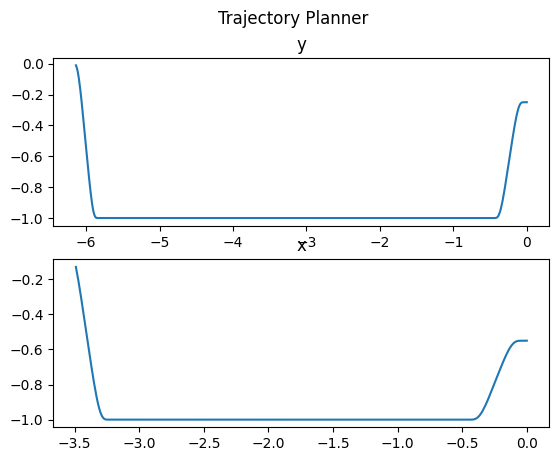

In [96]:
# area 1 to 2 red
delayY_withX = 0
oneDTrajLength_x = -3.5
oneDTrajV0_x = 0.55
oneDTrajVMax_x = 1.0
aRange_x = 0
bRangeStart_x = 0.48
bRangeFinal_x = 0.4
errorTol_x = 15./100.0
errorFinalTol_x = 5./100.0
delayX_withY = 5.155

oneDTrajLength_y = -6.15
oneDTrajV0_y = 0.25
oneDTrajVMax_y = 1.0
aRange_y = 0
bRangeStart_y = 0.48
bRangeFinal_y = 0.4
errorTol_y = 10./100.0
errorFinalTol_y = 5./100.0

plot(oneDTrajLength_x, oneDTrajV0_x, oneDTrajVMax_x, aRange_x, bRangeStart_x, bRangeFinal_x, errorTol_x, errorFinalTol_x, oneDTrajLength_y, oneDTrajV0_y, oneDTrajVMax_y, aRange_y, bRangeStart_y, bRangeFinal_y, errorTol_y, errorFinalTol_y)


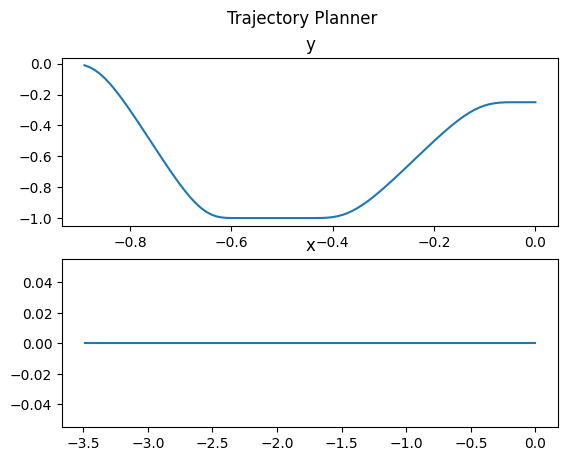

In [93]:
# naik ramp red/blue
oneDTrajLength_x = -3.5
oneDTrajV0_x = 0.0
oneDTrajVMax_x = 0.0
aRange_x = 0
bRangeStart_x = 0.48
bRangeFinal_x = 0.5
errorTol_x = 15./100.0
errorFinalTol_x = 5./100.0
delayX_withY = 0.0

oneDTrajLength_y = -0.9
oneDTrajV0_y = 0.25
oneDTrajVMax_y = 1.0
aRange_y = 0
bRangeStart_y = 0.48
bRangeFinal_y = 0.4
errorTol_y = 10./100.0
errorFinalTol_y = 5./100.0
delayY_withX = 0

plot(oneDTrajLength_x, oneDTrajV0_x, oneDTrajVMax_x, aRange_x, bRangeStart_x, bRangeFinal_x, errorTol_x, errorFinalTol_x, oneDTrajLength_y, oneDTrajV0_y, oneDTrajVMax_y, aRange_y, bRangeStart_y, bRangeFinal_y, errorTol_y, errorFinalTol_y)




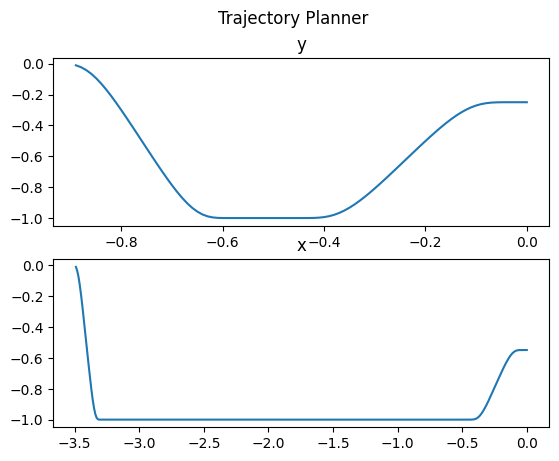

In [105]:
# area 2 to 3 red
oneDTrajLength_x = -3.5
oneDTrajV0_x = 0.55
oneDTrajVMax_x = 1.0
aRange_x = 0
bRangeStart_x = 0.48
bRangeFinal_x = 0.25
errorTol_x = 15./100.0
errorFinalTol_x = 5./100.0
delayX_withY = 0.0

oneDTrajLength_y = -0.9
oneDTrajV0_y = 0.25
oneDTrajVMax_y = 1.0
aRange_y = 0
bRangeStart_y = 0.48
bRangeFinal_y = 0.4
errorTol_y = 10./100.0
errorFinalTol_y = 5./100.0
delayY_withX = 0

plot(oneDTrajLength_x, oneDTrajV0_x, oneDTrajVMax_x, aRange_x, bRangeStart_x, bRangeFinal_x, errorTol_x, errorFinalTol_x, oneDTrajLength_y, oneDTrajV0_y, oneDTrajVMax_y, aRange_y, bRangeStart_y, bRangeFinal_y, errorTol_y, errorFinalTol_y)




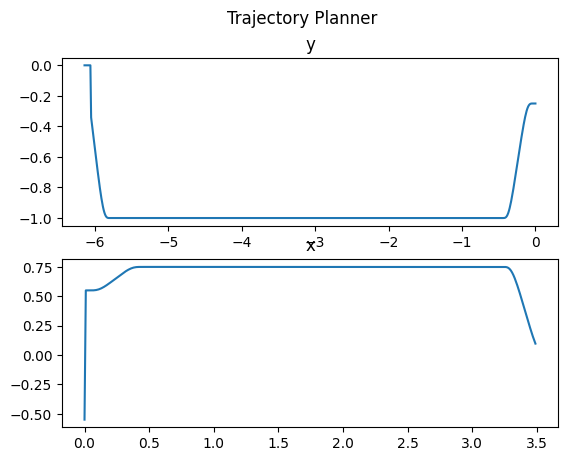

In [83]:
# area 1 to 2 blue
oneDTrajLength_x = 3.5
oneDTrajV0_x = 0.55
oneDTrajVMax_x = 0.75
aRange_x = 0
bRangeStart_x = 0.48
bRangeFinal_x = 0.4
errorTol_x = 15./100.0
errorFinalTol_x = 5./100.0
delayX_withY = 5.155

oneDTrajLength_y = -6.15
oneDTrajV0_y = 0.25
oneDTrajVMax_y = 1.0
aRange_y = 0
bRangeStart_y = 0.48
bRangeFinal_y = 0.5
errorTol_y = 10./100.0
errorFinalTol_y = 5./100.0
delayY_withX = 0

plot(oneDTrajLength_x, oneDTrajV0_x, oneDTrajVMax_x, aRange_x, bRangeStart_x, bRangeFinal_x, errorTol_x, errorFinalTol_x, oneDTrajLength_y, oneDTrajV0_y, oneDTrajVMax_y, aRange_y, bRangeStart_y, bRangeFinal_y, errorTol_y, errorFinalTol_y)


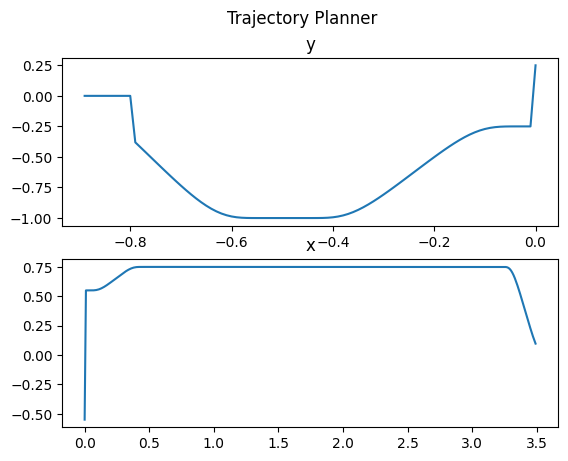

In [84]:
# area 2 to 3 blue
oneDTrajLength_x = 3.5
oneDTrajV0_x = 0.55
oneDTrajVMax_x = 0.75
aRange_x = 0
bRangeStart_x = 0.48
bRangeFinal_x = 0.4
errorTol_x = 15./100.0
errorFinalTol_x = 5./100.0
delayX_withY = 5.155

oneDTrajLength_y = -0.9
oneDTrajV0_y = 0.25
oneDTrajVMax_y = 1.0
aRange_y = 0
bRangeStart_y = 0.48
bRangeFinal_y = 0.5
errorTol_y = 10./100.0
errorFinalTol_y = 5./100.0
delayY_withX = 0

plot(oneDTrajLength_x, oneDTrajV0_x, oneDTrajVMax_x, aRange_x, bRangeStart_x, bRangeFinal_x, errorTol_x, errorFinalTol_x, oneDTrajLength_y, oneDTrajV0_y, oneDTrajVMax_y, aRange_y, bRangeStart_y, bRangeFinal_y, errorTol_y, errorFinalTol_y)



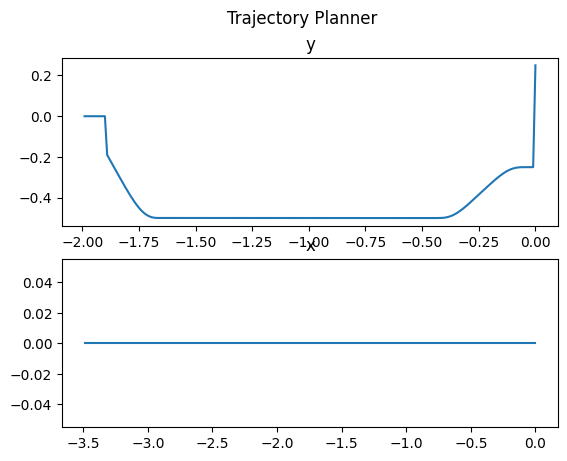

In [85]:
# AccelerateForward
oneDTrajLength_x = -3.5
oneDTrajV0_x = 0.0
oneDTrajVMax_x = 0.0
aRange_x = 0
bRangeStart_x = 0.48
bRangeFinal_x = 0.48
errorTol_x = 15./100.0
errorFinalTol_x = 5./100.0
delayX_withY = 0.0

oneDTrajLength_y = -2
oneDTrajV0_y = 0.25
oneDTrajVMax_y = 0.5
aRange_y = 0
bRangeStart_y = 0.48
bRangeFinal_y = 0.5
errorTol_y = 10./100.0
errorFinalTol_y = 5./100.0
delayY_withX = 0

plot(oneDTrajLength_x, oneDTrajV0_x, oneDTrajVMax_x, aRange_x, bRangeStart_x, bRangeFinal_x, errorTol_x, errorFinalTol_x, oneDTrajLength_y, oneDTrajV0_y, oneDTrajVMax_y, aRange_y, bRangeStart_y, bRangeFinal_y, errorTol_y, errorFinalTol_y)


